# 	Time Series Classification| Logistic Regression

Import needed libraries

In [1]:
import pandas as pd  #
import numpy as np
import seaborn as sns ## seaborn visualization library
import matplotlib.pyplot as plt
%matplotlib inline
#import math
#import xlrd
import csv
import os, os.path
import statsmodels.api as sm


from statistics import stdev
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
import sklearn
import sklearn.linear_model as lm
#import sklearn.grid_search as gs
from sklearn.metrics  import classification_report,confusion_matrix
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.metrics import accuracy_score
import scipy
import scikits.bootstrap as bootstrap  ### pip install scikits.bootstrap
from sklearn.linear_model import Lasso
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


###### Test data : datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data.
###### Train data: remaining datasets

In [2]:
#xl = pd.read_csv('bending1\dataset1.csv') ## to read excel file


def readFile (filename) : 
    f = open(filename)
    temp=[]
    lines = f.readlines()
    df=pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    for line in lines[5:]:
        temp = line.strip('\n').split(',')
        df= df.append({'avg_rss12':temp[1],'var_rss12':temp[2],'avg_rss13':temp[3],'var_rss13':temp[4],'avg_rss23':temp[5],'var_rss23':temp[6]}, ignore_index=True)
        #df= df.append({'# Columns: time' : int(temp[0]),'avg_rss12':int(temp[1]),'var_rss12':int(temp[2]),'avg_rss13':int(temp[3]),'var_rss13':int(temp[4]),'avg_rss23':int(temp[5]),'var_rss23':int(temp[6])}, ignore_index=True)
    #print(df.tail())
    
    return(df)

In [3]:
### reading files from location where bending1,bending2,cycling,lying,sitting,standing and walking are present

dir_list = ['bending1','bending2','cycling','lying','sitting','standing','walking']
dir_file = []
test_list =[]
train_list = []
for directory in dir_list :
    dir_file = os.listdir(directory)
    #print(directory)
    #print(dir_file)
    if directory == 'bending1' :
        test_list.append(str(directory)+'\\' + str(dir_file[0]))
        test_list.append(str(directory)+'\\' + str(dir_file[1]))
        train_list.append(str(directory)+'\\' + str(dir_file[2]))
        train_list.append(str(directory)+'\\' + str(dir_file[3]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[4]))
        train_list.append(str(directory)+'\\' + str(dir_file[5]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[6]))

        
    elif   directory == 'bending2' :
        test_list.append(str(directory)+'\\' + str(dir_file[0]))
        test_list.append(str(directory)+'\\' + str(dir_file[1]))
        train_list.append(str(directory)+'\\' + str(dir_file[2]))
        #train_list.append(str(directory)+'\\' + str(dir_file[3]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[4]))
        train_list.append(str(directory)+'\\' + str(dir_file[5]))                          


    else :
        test_list.append(str(directory)+'\\' + str(dir_file[0]))
        test_list.append(str(directory)+'\\' + str(dir_file[7]))
        test_list.append(str(directory)+'\\' + str(dir_file[8]))
        train_list.append(str(directory)+'\\' + str(dir_file[3]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[4]))
        train_list.append(str(directory)+'\\' + str(dir_file[5]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[6]))
        train_list.append(str(directory)+'\\' + str(dir_file[1]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[2]))
        train_list.append(str(directory)+'\\' + str(dir_file[9]))
        train_list.append(str(directory)+'\\' + str(dir_file[10]))
        train_list.append(str(directory)+'\\' + str(dir_file[11]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[12]))
        train_list.append(str(directory)+'\\' + str(dir_file[13]))                          
        train_list.append(str(directory)+'\\' + str(dir_file[14]))                        
print("\033[1m")
print("\n \033[1m List of files used for test data : \033[0m   " )
print(" \033[1m ==================================== \033[0m \n   " )
print(pd.DataFrame(test_list))
print("\n \033[1m List of files used for train data : \033[0m " )
print(" \033[1m ===================================== \033[0m \n   " )
print(pd.DataFrame(train_list))
print("\033[0m")



  List of files used for test data :    
   
                        0
0   bending1\dataset1.csv
1   bending1\dataset2.csv
2   bending2\dataset1.csv
3   bending2\dataset2.csv
4    cycling\dataset1.csv
5    cycling\dataset2.csv
6    cycling\dataset3.csv
7      lying\dataset1.csv
8      lying\dataset2.csv
9      lying\dataset3.csv
10   sitting\dataset1.csv
11   sitting\dataset2.csv
12   sitting\dataset3.csv
13  standing\dataset1.csv
14  standing\dataset2.csv
15  standing\dataset3.csv
16   walking\dataset1.csv
17   walking\dataset2.csv
18   walking\dataset3.csv

  List of files used for train data :  
   
                         0
0    bending1\dataset3.csv
1    bending1\dataset4.csv
2    bending1\dataset5.csv
3    bending1\dataset6.csv
4    bending1\dataset7.csv
5    bending2\dataset3.csv
6    bending2\dataset5.csv
7    bending2\dataset6.csv
8    cycling\dataset12.csv
9    cycling\dataset13.csv
10   cycling\dataset14.csv
11   cycling\dataset15.csv
12   cycling\dataset10.csv
13   cycli

In [4]:
##### consolidated list of files for training and test data.

all_files = pd.concat([pd.DataFrame(train_list),pd.DataFrame(test_list)],ignore_index=True)

In [5]:
#df_test = readFile(str(all_files.iloc[1]).strip(' ').strip())
print(all_files.iloc[0])
print(pd.DataFrame(train_list).iloc[0])

0    bending1\dataset3.csv
Name: 0, dtype: object
0    bending1\dataset3.csv
Name: 0, dtype: object


In [6]:
### reading test data from files 

df_test = pd.DataFrame()
for i in test_list:
    #print(i)
    df_temp = readFile(str(i))
    df_test=  df_test.append(df_temp,ignore_index=True)
print("\033[1m")
print("\n \033[1m Info of Test Data : \033[0m    " )
print(" \033[1m ================================== \033[0m \n   " )
print(df_test.info())



  Info of Test Data :     
   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 6 columns):
avg_rss12    9120 non-null object
var_rss12    9120 non-null object
avg_rss13    9120 non-null object
var_rss13    9120 non-null object
avg_rss23    9120 non-null object
var_rss23    9120 non-null object
dtypes: object(6)
memory usage: 427.6+ KB
None


In [7]:
### reading training data from files
df_train = pd.DataFrame()
for i in train_list:
    #print(i)
    df_temp = readFile(str(i))
    df_train= df_train.append(df_temp,ignore_index = True)
print("\033[1m")
print("\n \033[1m Info of Training Data : \033[0m    " )
print(" \033[1m ================================== \033[0m \n   " )

print(df_train.info())



  Info of Training Data :     
   
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32639 entries, 0 to 32638
Data columns (total 6 columns):
avg_rss12    32639 non-null object
var_rss12    32639 non-null object
avg_rss13    32639 non-null object
var_rss13    32639 non-null object
avg_rss23    32639 non-null object
var_rss23    32639 non-null object
dtypes: object(6)
memory usage: 1.5+ MB
None


In [8]:
####reading bending2\dataset4.csv separately as the data is in different format from the rest.
f = open('bending2\dataset4.csv')#### bending2/dataset4 is corrupt
temp_b2=[]
lines_b2 = f.readlines()
df_b2=pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
for line_b2 in lines_b2[5:]:
    #print(line_b2)
    temp_b2 = line_b2.strip('').strip('\n').split(' ')
    #print(temp_b2)
    df_b2= df_b2.append({'avg_rss12':temp_b2[1],'var_rss12':temp_b2[2],'avg_rss13':temp_b2[3],'var_rss13':temp_b2[4],'avg_rss23':temp_b2[5],'var_rss23':temp_b2[6]}, ignore_index=True)
print(df_b2)

    avg_rss12 var_rss12 avg_rss13 var_rss13 avg_rss23 var_rss23
0       32.50      0.50      0.00      0.00     19.00      1.00
1       32.50      0.50      0.00      0.00     18.50      0.50
2       32.75      0.43      1.00      0.00     18.00      0.00
3       32.50      0.50      0.00      0.00     17.50      0.50
4       32.50      0.50      7.50      0.50     17.50      0.87
5       32.67      0.47     11.00      1.00     16.75      0.83
6       32.50      0.50      6.25      0.83     18.00      0.00
7       32.50      0.50      3.50      0.87     18.00      0.00
8       32.33      0.47      6.00      0.00     18.33      0.47
9       32.67      0.47      8.00      0.82     18.00      0.00
10      32.50      0.50      8.33      3.30     16.67      0.47
11      32.50      0.50     10.33      1.25     16.00      1.22
12      32.25      0.83      9.00      3.08     16.00      0.71
13      32.00      0.00      2.67      0.47     15.75      0.83
14      31.75      0.43      2.75      1

In [9]:
#appending the bending2\dataset4.csv to the training dataset
df_train = pd.DataFrame()
for k in train_list:
    #print(k)
    df_temp1 = readFile(str(k))
    #print(df_temp1)
    df_train=  df_train.append(df_temp1,ignore_index=True)
    
df_train = df_train.append(df_b2,sort=True,ignore_index = True)
#print(df_test)
print("\033[1m")
print("\n \033[1m Info of Training Data : \033[0m    " )
print(" \033[1m ================================== \033[0m \n   " )
print(df_train.tail())



  Info of Training Data :     
   
      avg_rss12 avg_rss13 avg_rss23 var_rss12 var_rss13 var_rss23
33114     28.67      4.67     17.33      0.47      1.25      0.47
33115     27.50      5.50     17.25      0.50      2.50      1.30
33116     28.00      6.67     17.00      0.00      0.94      1.00
33117     28.00      5.00     17.00      0.00      0.82      0.71
33118     28.00      0.00     17.00      0.00      0.00      1.00


##### Feature Extraction Classification of time series-time domain features

##### Time-domain features are usually used in time series classification 

Mean, Median, Average, Minimum, Maximum, Variance, 1st quartile, 3rd quartile, interquartile, RootMeanSquare, Skweness, Kurtosis are the usual time domain featues extracted from time-series.

##### Extrating the time-domain features 

In [12]:
# extraction of time-domain features
all_list = train_list + test_list
all_list.sort()
print("list of all files \n")
print(all_list)


list of all files 

['bending1\\dataset1.csv', 'bending1\\dataset2.csv', 'bending1\\dataset3.csv', 'bending1\\dataset4.csv', 'bending1\\dataset5.csv', 'bending1\\dataset6.csv', 'bending1\\dataset7.csv', 'bending2\\dataset1.csv', 'bending2\\dataset2.csv', 'bending2\\dataset3.csv', 'bending2\\dataset5.csv', 'bending2\\dataset6.csv', 'cycling\\dataset1.csv', 'cycling\\dataset10.csv', 'cycling\\dataset11.csv', 'cycling\\dataset12.csv', 'cycling\\dataset13.csv', 'cycling\\dataset14.csv', 'cycling\\dataset15.csv', 'cycling\\dataset2.csv', 'cycling\\dataset3.csv', 'cycling\\dataset4.csv', 'cycling\\dataset5.csv', 'cycling\\dataset6.csv', 'cycling\\dataset7.csv', 'cycling\\dataset8.csv', 'cycling\\dataset9.csv', 'lying\\dataset1.csv', 'lying\\dataset10.csv', 'lying\\dataset11.csv', 'lying\\dataset12.csv', 'lying\\dataset13.csv', 'lying\\dataset14.csv', 'lying\\dataset15.csv', 'lying\\dataset2.csv', 'lying\\dataset3.csv', 'lying\\dataset4.csv', 'lying\\dataset5.csv', 'lying\\dataset6.csv', 'lyi

In [14]:
####### for all files except bending2/dataset4
p=0
i=0
cols = []
summary =pd.DataFrame()
for l in all_list:
    #print(l)
    df1 = readFile(str(l))
    #print(df1)
    #print("i")
    #print(i)
    #print("p")
    #print(p)
    for i  in pd.DataFrame(df1) :
        summary.at[p,'Min_{}'.format(i)] = min(df1[i].astype('float'))
        summary.at[p,'Max_{}'.format(i)] = max(df1[i].astype('float'))
        summary.at[p,'Mean_{}'.format(i)] = np.mean(df1[i].astype('float'))
        summary.at[p,'Median_{}'.format(i)] = np.percentile(df1[i].astype('float'),50)
        summary.at[p,'Q1_{}'.format(i)] = np.percentile(df1[i].astype('float'),25)
        summary.at[p,'Q3_{}'.format(i)] = np.percentile(df1[i].astype('float'),75)
        summary.at[p,'Stdev_{}'.format(i)] = stdev(df1[i].astype('float'))
    p=p+1   
        

#print(pd.DataFrame(summary))
       

##### for bending4/dataset4.csv
h=0

for h  in pd.DataFrame(df_b2) :
        summary.at[p,'Min_{}'.format(h)] = min(df_b2[h].astype('float'))
        summary.at[p,'Max_{}'.format(h)] = max(df_b2[h].astype('float'))
        summary.at[p,'Mean_{}'.format(h)] = np.mean(df_b2[h].astype('float'))
        summary.at[p,'Median_{}'.format(h)] = np.percentile(df_b2[h].astype('float'),50)
        summary.at[p,'Q1_{}'.format(h)] = np.percentile(df_b2[h].astype('float'),25)
        summary.at[p,'Q3_{}'.format(h)] = np.percentile(df_b2[h].astype('float'),75)
        summary.at[p,'Stdev_{}'.format(h)] = stdev(df_b2[h].astype('float'))
print("summary of dataframe with timedomain features :\n ")        
print(pd.DataFrame(summary))
        

summary of dataframe with timedomain features :
 
    Min_avg_rss12  Max_avg_rss12  Mean_avg_rss12  Median_avg_rss12  \
0           37.25          45.00       40.624792            40.500   
1           38.00          45.67       42.812812            42.500   
2           35.00          47.40       43.954500            44.330   
3           33.00          47.75       42.179813            43.500   
4           33.00          45.75       41.678063            41.750   
5           37.00          48.00       43.454958            43.250   
6           36.25          48.00       43.969125            44.500   
7           12.75          51.00       24.562958            24.250   
8            0.00          42.75       27.464604            28.000   
9           21.00          50.00       32.586208            33.000   
10          19.00          45.50       30.938104            29.000   
11          25.00          47.50       31.058250            29.710   
12          24.25          45.00       3

###### Building a 90% bootsrap confidence interval for the standard deviation of each time-domain feature

In [15]:
## computation of standard deviation
stdev = []
stdev = pd.DataFrame(summary.std())#.transpose()
print(stdev)

                         0
Min_avg_rss12     9.569975
Max_avg_rss12     4.394362
Mean_avg_rss12    5.335718
Median_avg_rss12  5.440054
Q1_avg_rss12      6.153590
Q3_avg_rss12      5.138925
Stdev_avg_rss12   1.772153
Min_var_rss12     0.000000
Max_var_rss12     5.062729
Mean_var_rss12    1.574164
Median_var_rss12  1.412244
Q1_var_rss12      0.946386
Q3_var_rss12      2.125266
Stdev_var_rss12   0.884105
Min_avg_rss13     2.956462
Max_avg_rss13     4.875137
Mean_avg_rss13    4.008380
Median_avg_rss13  4.036396
Q1_avg_rss13      4.220658
Q3_avg_rss13      4.171628
Stdev_avg_rss13   0.946710
Min_var_rss13     0.000000
Max_var_rss13     2.183625
Mean_var_rss13    1.166114
Median_var_rss13  1.145586
Q1_var_rss13      0.843620
Q3_var_rss13      1.552504
Stdev_var_rss13   0.458242
Min_avg_rss23     6.124001
Max_avg_rss23     5.741238
Mean_avg_rss23    5.675593
Median_avg_rss23  5.813782
Q1_avg_rss23      6.096465
Q3_avg_rss23      5.531720
Stdev_avg_rss23   1.024898
Min_var_rss23     0.045838
M

In [16]:
CIs = bootstrap.ci(data=stdev,statfunction=scipy.mean,alpha=0.1)
print("below is the 90% bootstrap confidence interval :")
print(CIs[0],CIs[1])

below is the 90% bootstrap confidence interval :
2.451373794344974 3.6390882166265417


##### finding three most important time-domain features (one option may be min, mean, and max).

In [18]:
print("standard deviations for time domain features: \n")
stdev.sort_values(by=0)

standard deviations for time domain features: 



,0
Min_var_rss13,0.000000
Min_var_rss12,0.000000
Min_var_rss23,0.045838
Stdev_var_rss13,0.458242
Stdev_var_rss23,0.517617
Q1_var_rss23,0.758584
Q1_var_rss13,0.843620
Stdev_var_rss12,0.884105
Q1_var_rss12,0.946386
Stdev_avg_rss13,0.946710


Sorting the standard deviation outcomes calculated for above time-domain features, we obtain, min,standard deviation and Q1.
However, I choose to work with min, max and mean as specified in the question.

###### Solving the problem as a binary classification problem

In [19]:
def readAllNew(filename) : 
    f = open(filename)
    temp=[]
    lines = f.readlines()
    df2=pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
    for line in lines[5:]:
        temp1 = line.strip('\n').split(',')
        df2= df2.append({'avg_rss12':temp1[1],'var_rss12':temp1[2],'avg_rss13':temp1[3],'var_rss13':temp1[4],'avg_rss23':temp1[5],'var_rss23':temp1[6]}, ignore_index=True)
            #print(filename)
   
    return(df2)

In [20]:
#print(df_b2)
#df_train1 = df_train1.append(df_b2,sort=True,ignore_index = True)
df_train_sum = pd.DataFrame()
p=0
#print(df_train_sum.columns)
for k in train_list:
    #print(k)
    df_temp1 = readAllNew(str(k))
    #print(df_temp1)
    #df_train1=  df_train1.append(df_temp1,ignore_index=True)
    for s  in pd.DataFrame(df_temp1) :
        #print(s)
        df_train_sum.at[p,'Min_{}'.format(s)] = min(df_temp1[s].astype('float'))
        #print("min")
        df_train_sum.at[p,'Max_{}'.format(s)] = max(df_temp1[s].astype('float'))
        #print("max")
        df_train_sum.at[p,'Mean_{}'.format(s)] = np.mean(df_temp1[s].astype('float'))
        #print("mean")
        #print(df_train_sum)
        #print("P={}".format(p))
        #print(df_train_sum.columns)
    if 'bending' in k :
        df_train_sum.at[p,'Class'] = 1
    else:
        df_train_sum.at[p,'Class'] = 0
        
    p=p+1

    
#df_train1 = df_train1.append(df_b2,sort=True,ignore_index = True)
#print(df_test)
#print(df_train1.tail())

f = open('bending2\dataset4.csv')#### bending2/dataset4 is corrupt
temp_b2=[]
lines_b2 = f.readlines()
df_b2=pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
for line_b2 in lines_b2[5:]:
    #print(line_b2)
    temp_b2 = line_b2.strip('').strip('\n').split(' ')
    #print(temp_b2)
    df_b2= df_b2.append({'avg_rss12':temp_b2[1],'var_rss12':temp_b2[2],'avg_rss13':temp_b2[3],'var_rss13':temp_b2[4],'avg_rss23':temp_b2[5],'var_rss23':temp_b2[6]}, ignore_index=True)
    
for s  in pd.DataFrame(df_b2) :
    df_train_sum.at[p,'Min_{}'.format(s)] = min(df_b2[s].astype('float'))
    df_train_sum.at[p,'Max_{}'.format(s)] = max(df_b2[s].astype('float'))
    df_train_sum.at[p,'Mean_{}'.format(s)] = np.mean(df_b2[s].astype('float'))
df_train_sum.at[p,'Class'] = 1
    #p=p+1
print(df_train_sum.columns) 
 

print(df_train_sum)


Index(['Min_avg_rss12', 'Max_avg_rss12', 'Mean_avg_rss12', 'Min_var_rss12',
       'Max_var_rss12', 'Mean_var_rss12', 'Min_avg_rss13', 'Max_avg_rss13',
       'Mean_avg_rss13', 'Min_var_rss13', 'Max_var_rss13', 'Mean_var_rss13',
       'Min_avg_rss23', 'Max_avg_rss23', 'Mean_avg_rss23', 'Min_var_rss23',
       'Max_var_rss23', 'Mean_var_rss23', 'Class'],
      dtype='object')
    Min_avg_rss12  Max_avg_rss12  Mean_avg_rss12  Min_var_rss12  \
0           35.00          47.40       43.954500            0.0   
1           33.00          47.75       42.179813            0.0   
2           33.00          45.75       41.678063            0.0   
3           37.00          48.00       43.454958            0.0   
4           36.25          48.00       43.969125            0.0   
5           21.00          50.00       32.586208            0.0   
6           19.00          45.50       30.938104            0.0   
7           25.00          47.50       31.058250            0.0   
8           18.50 

In [23]:
df_pair=[]
df_pair= pd.DataFrame(df_train_sum.filter(['Min_avg_rss13', 'Max_avg_rss13',
       'Mean_avg_rss13', 'Min_var_rss13', 'Max_var_rss13', 'Mean_var_rss13',
       'Min_avg_rss23', 'Max_avg_rss23', 'Mean_avg_rss23','Class'],axis=1))
#df_pair.drop('Min_avg_rss12', axis=1)
print(len(df_pair))
print(df_pair.columns)
color=np.where(df_pair['Class'] == 1,'pink','green')
#plt.figure(figsize=(10,7))
#plt.scatter(df_pair['Min_avg_rss13'],df_pair['Max_avg_rss13'],c=color,marker='o',edgecolors='black')


69
Index(['Min_avg_rss13', 'Max_avg_rss13', 'Mean_avg_rss13', 'Min_var_rss13',
       'Max_var_rss13', 'Mean_var_rss13', 'Min_avg_rss23', 'Max_avg_rss23',
       'Mean_avg_rss23', 'Class'],
      dtype='object')


In [24]:
#df_pair['Class'].unique()

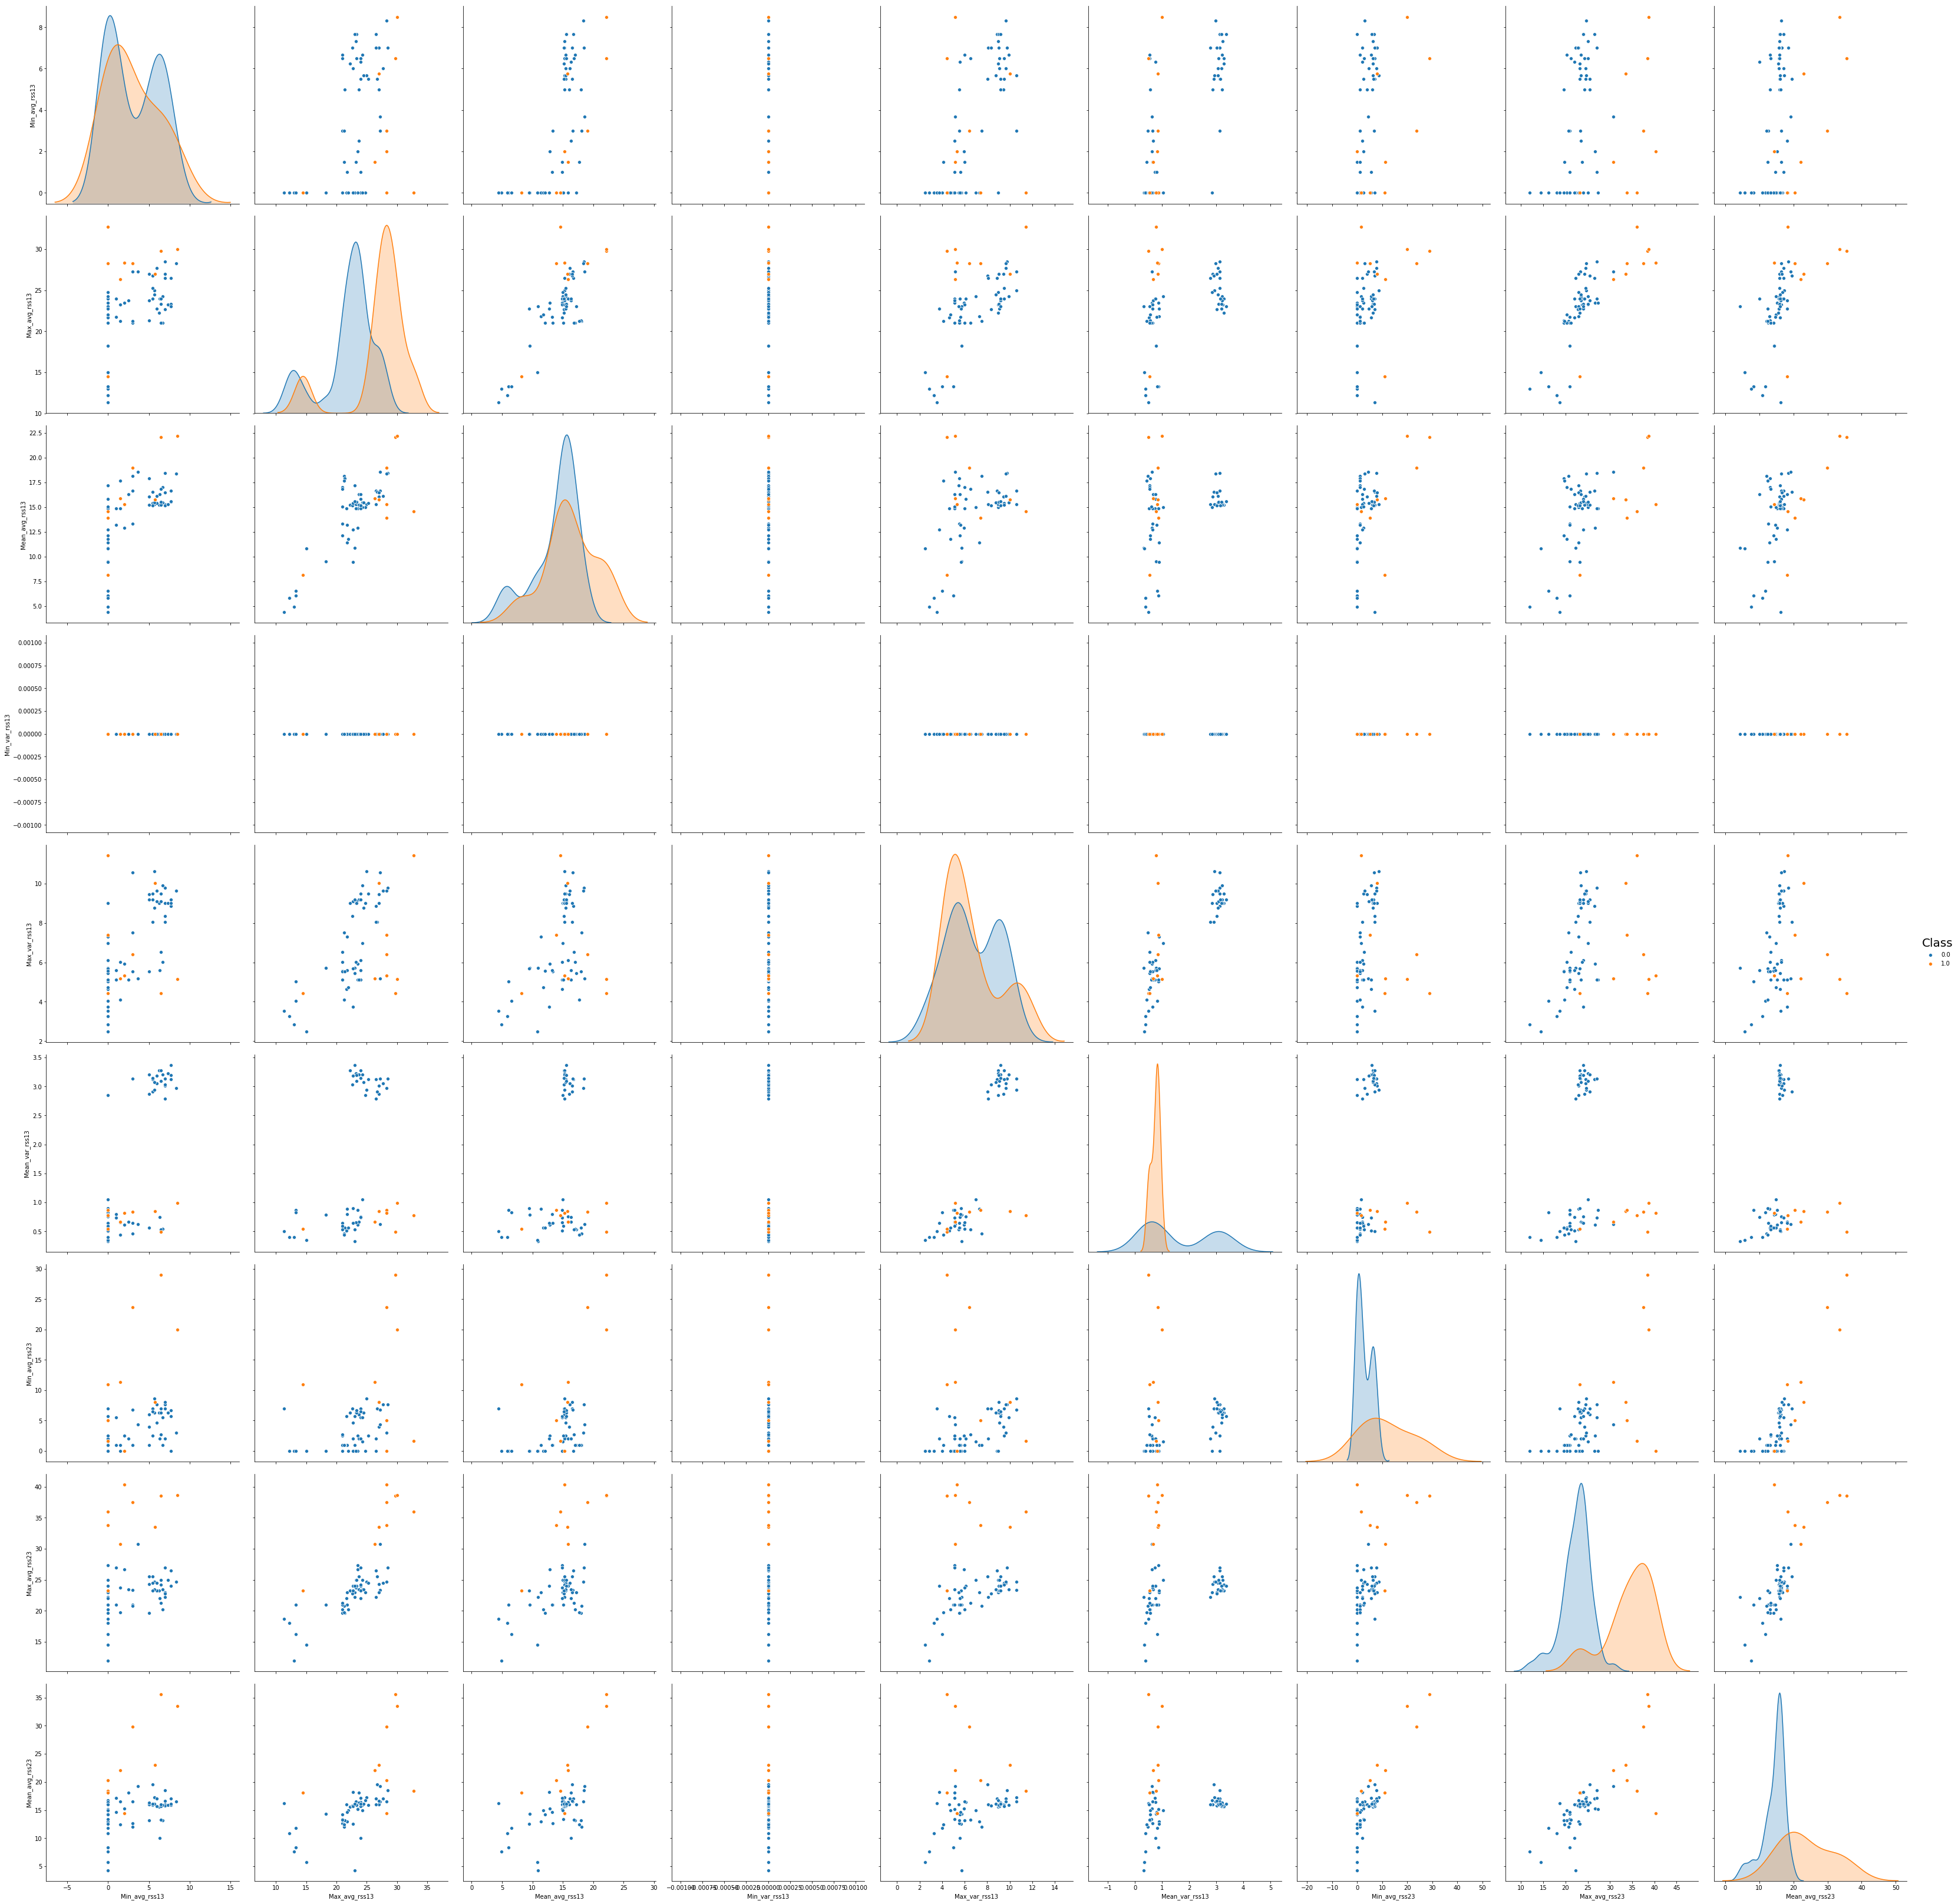

In [28]:
warnings.filterwarnings("ignore")
g = sns.pairplot(df_pair,vars = ['Min_avg_rss13', 'Max_avg_rss13', 'Mean_avg_rss13', 'Min_var_rss13',
       'Max_var_rss13', 'Mean_var_rss13', 'Min_avg_rss23', 'Max_avg_rss23',
       'Mean_avg_rss23'],hue='Class',height = 5)

g._legend.get_title().set_fontsize(20)

###### Sampling the given data.

In [29]:
df_train_sum1 = pd.DataFrame()
df_temp2 = pd.DataFrame()
m=0
q=1
j=2
for file in train_list:
    df_temp2 = readAllNew(str(k))        
    for s  in pd.DataFrame(df_temp1) :
        #print(s)
        #print(q)
        #print(j)
        df_train_sum1.at[m,'Min_{}_{}'.format(s,q)] = min(df_temp2.iloc[0:239,df_temp2.columns.get_loc(s)].astype('float'))
        df_train_sum1.at[m,'Max_{}_{}'.format(s,q)] = max(df_temp2.iloc[0:239,df_temp2.columns.get_loc(s)].astype('float'))
        df_train_sum1.at[m,'Mean_{}_{}'.format(s,q)] = np.mean(df_temp2.iloc[0:239,df_temp2.columns.get_loc(s)].astype('float'))
        df_train_sum1.at[m,'Min_{}_{}'.format(s,j)] = min(df_temp2.iloc[240:479,df_temp2.columns.get_loc(s)].astype('float'))
        df_train_sum1.at[m,'Max_{}_{}'.format(s,j)] = max(df_temp2.iloc[240:479,df_temp2.columns.get_loc(s)].astype('float'))
        df_train_sum1.at[m,'Mean_{}_{}'.format(s,j)] = np.mean(df_temp2.iloc[240:479,df_temp2.columns.get_loc(s)].astype('float'))
        #print("mean {}".format(df_train_sum1.at[m,'Mean_{}_{}'.format(s,j)]))
        #print(df_train_sum1.iloc[m,:])
    if 'bending' in file :
        df_train_sum1.at[m,'Class'] = 1
    else:
        df_train_sum1.at[m,'Class'] = 0
        
    m=m+1
print("M = {}".format(m))
q1=1
j1=2
f = open('bending2\dataset4.csv')#### bending2/dataset4 is corrupt
temp_b3=[]
lines_b3 = f.readlines()
df_b3=pd.DataFrame(columns=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
for line_b3 in lines_b3[5:]:
    #print(line_b3)
    temp_b3 = line_b3.strip('').strip('\n').split(' ')
    #print(temp_b3)
    df_b3= df_b3.append({'avg_rss12':temp_b3[1],'var_rss12':temp_b3[2],'avg_rss13':temp_b3[3],'var_rss13':temp_b3[4],'avg_rss23':temp_b3[5],'var_rss23':temp_b3[6]}, ignore_index=True)
    
for s1  in pd.DataFrame(df_b3) :
        df_train_sum1.at[m,'Min_{}_{}'.format(s1,q1)] = min(df_b3.iloc[0:239,df_b3.columns.get_loc(s1)].astype('float'))
        df_train_sum1.at[m,'Max_{}_{}'.format(s1,q1)] = max(df_b3.iloc[0:239,df_b3.columns.get_loc(s1)].astype('float'))
        df_train_sum1.at[m,'Mean_{}_{}'.format(s1,q1)] = np.mean(df_b3.iloc[0:239,df_b3.columns.get_loc(s1)].astype('float'))
        df_train_sum1.at[m,'Min_{}_{}'.format(s1,j1)] = min(df_b3.iloc[240:479,df_b3.columns.get_loc(s1)].astype('float'))
        df_train_sum1.at[m,'Max_{}_{}'.format(s1,j1)] = max(df_b3.iloc[240:479,df_b3.columns.get_loc(s1)].astype('float'))
        df_train_sum1.at[m,'Mean_{}_{}'.format(s1,j1)] = np.mean(df_b3.iloc[240:479,df_b3.columns.get_loc(s1)].astype('float'))
df_train_sum1.at[m,'Class'] = 1
    #p=p+1
print(df_train_sum1.columns)

M = 68
Index(['Min_avg_rss12_1', 'Max_avg_rss12_1', 'Mean_avg_rss12_1',
       'Min_avg_rss12_2', 'Max_avg_rss12_2', 'Mean_avg_rss12_2',
       'Min_var_rss12_1', 'Max_var_rss12_1', 'Mean_var_rss12_1',
       'Min_var_rss12_2', 'Max_var_rss12_2', 'Mean_var_rss12_2',
       'Min_avg_rss13_1', 'Max_avg_rss13_1', 'Mean_avg_rss13_1',
       'Min_avg_rss13_2', 'Max_avg_rss13_2', 'Mean_avg_rss13_2',
       'Min_var_rss13_1', 'Max_var_rss13_1', 'Mean_var_rss13_1',
       'Min_var_rss13_2', 'Max_var_rss13_2', 'Mean_var_rss13_2',
       'Min_avg_rss23_1', 'Max_avg_rss23_1', 'Mean_avg_rss23_1',
       'Min_avg_rss23_2', 'Max_avg_rss23_2', 'Mean_avg_rss23_2',
       'Min_var_rss23_1', 'Max_var_rss23_1', 'Mean_var_rss23_1',
       'Min_var_rss23_2', 'Max_var_rss23_2', 'Mean_var_rss23_2', 'Class'],
      dtype='object')


In [ ]:
#print(df_train_sum1.isnull)

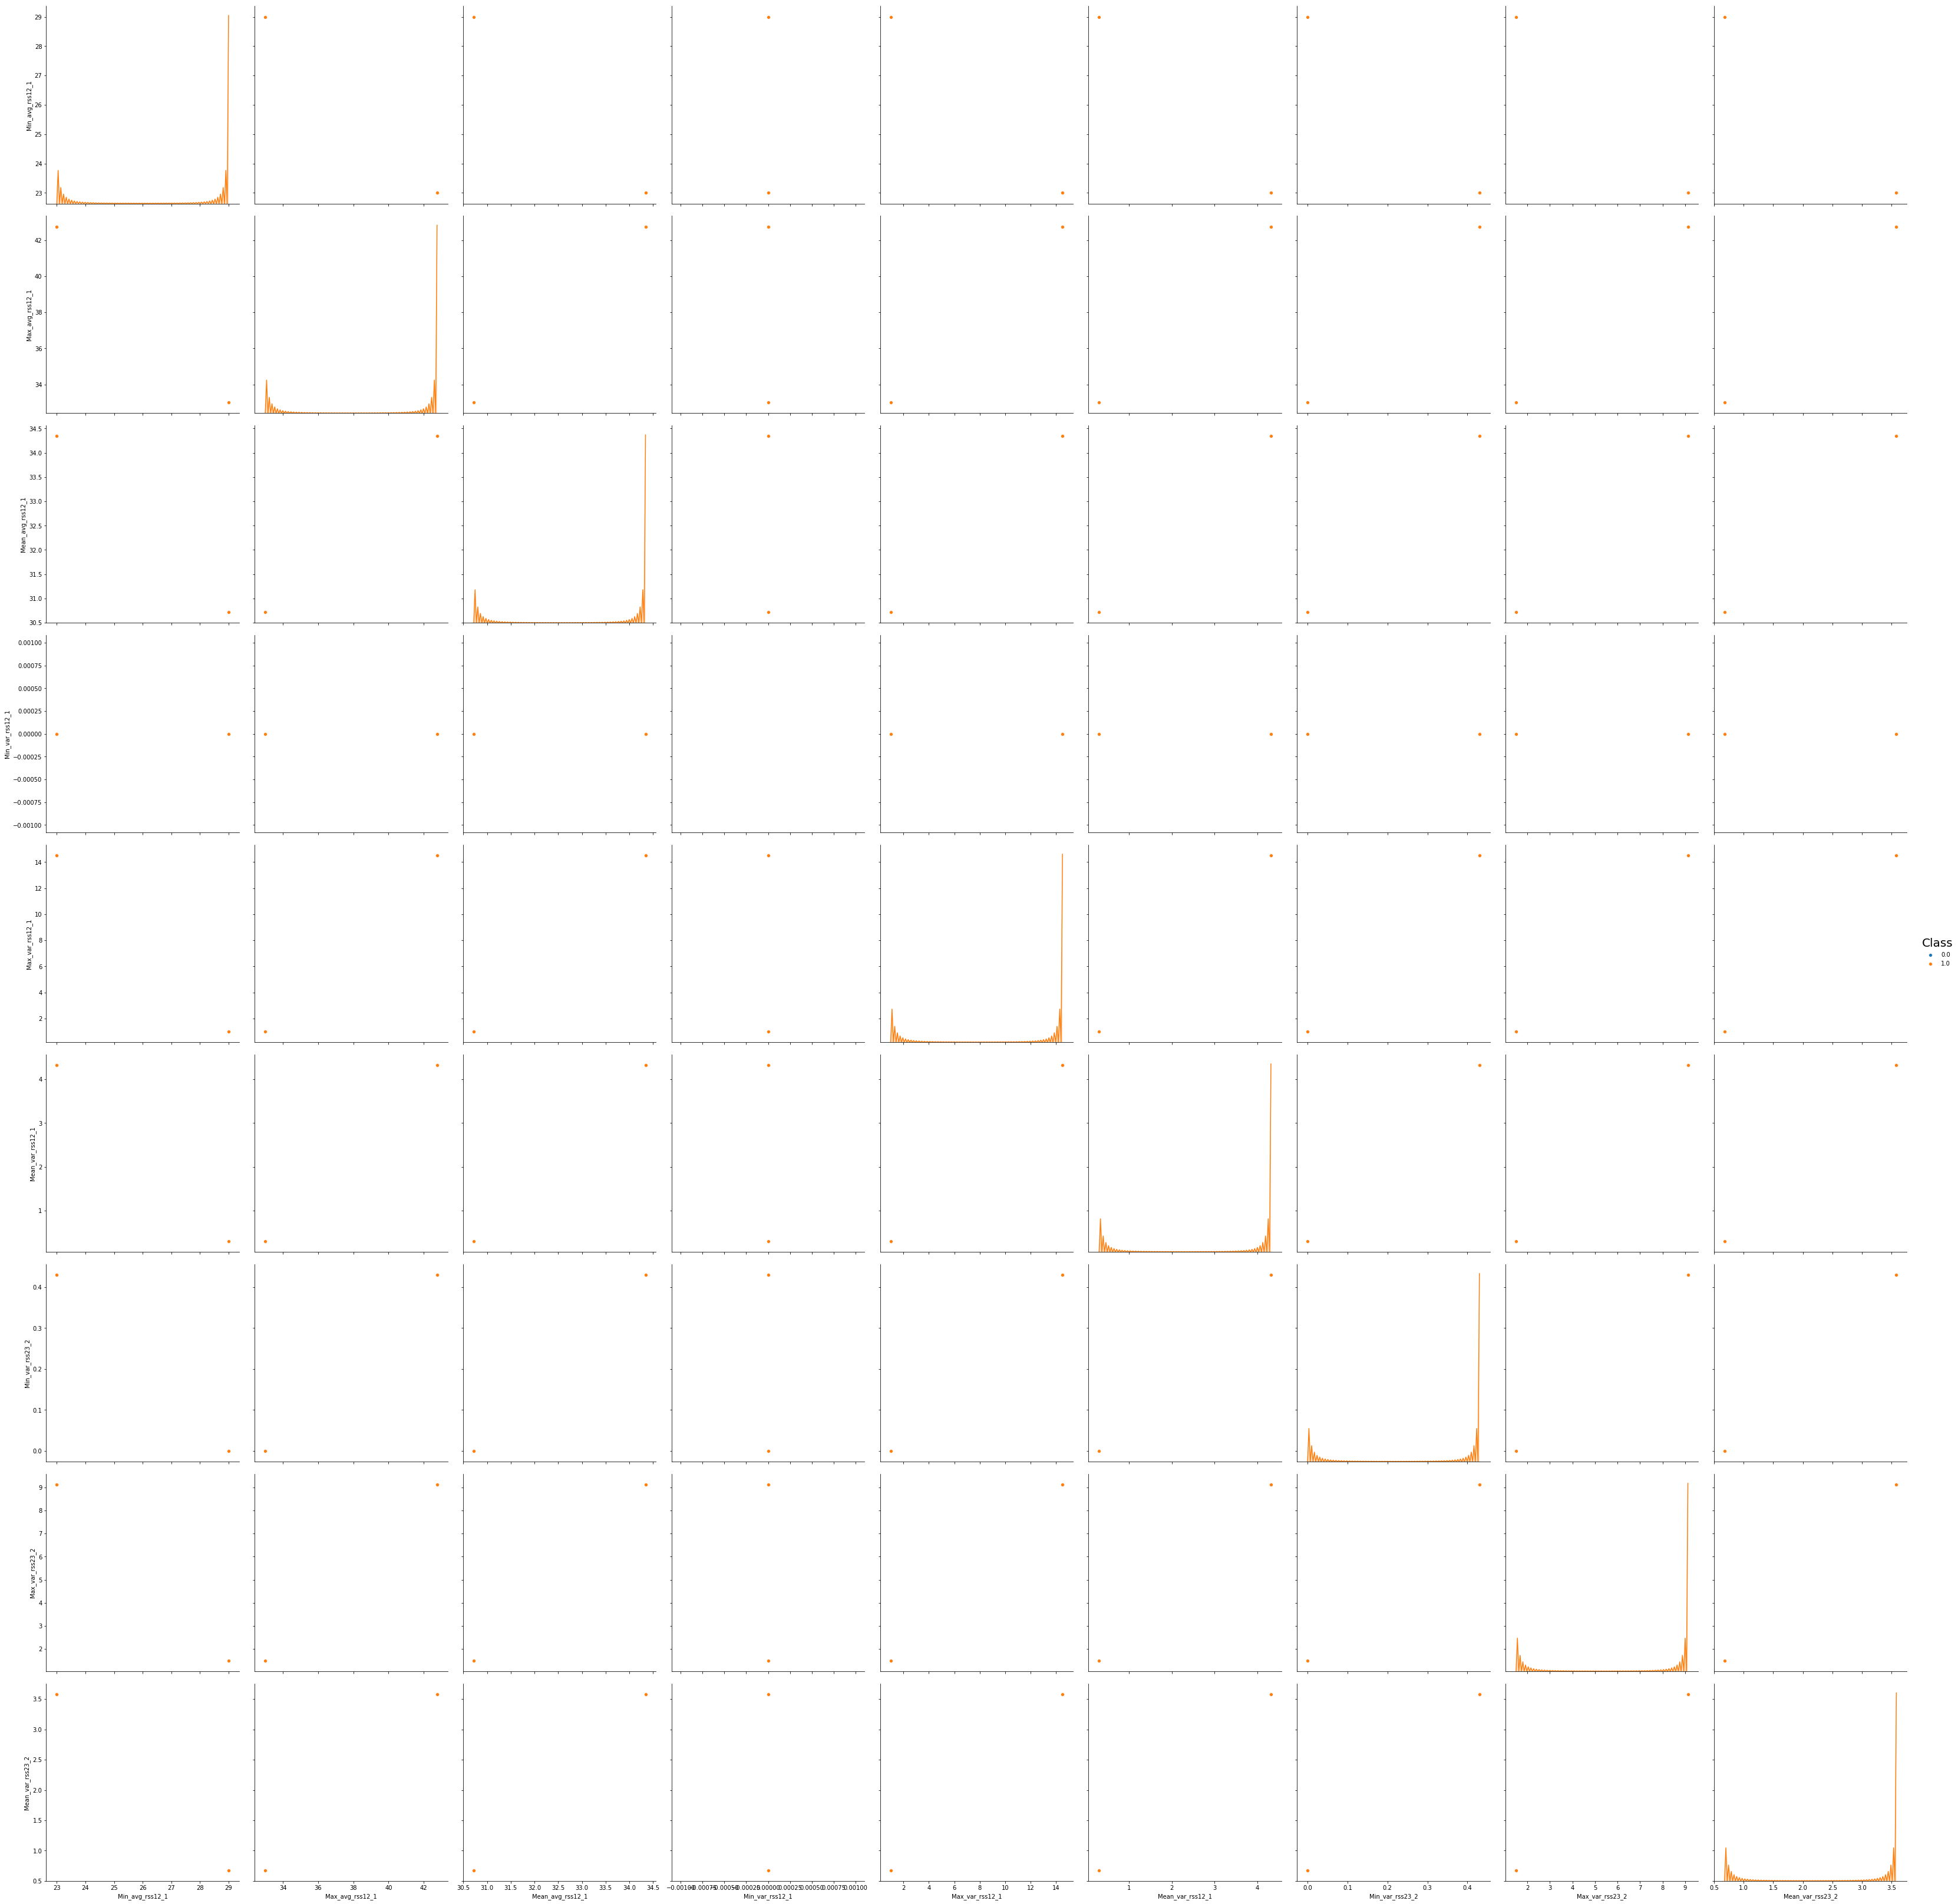

In [30]:
warnings.filterwarnings("ignore")
g= sns.pairplot(df_train_sum1,vars = ['Min_avg_rss12_1', 'Max_avg_rss12_1', 'Mean_avg_rss12_1',
       'Min_var_rss12_1', 'Max_var_rss12_1', 'Mean_var_rss12_1','Min_var_rss23_2', 'Max_var_rss23_2', 'Mean_var_rss23_2'],hue='Class',height = 5)


g._legend.get_title().set_fontsize(20)

In [31]:

print(df_train_sum.columns) 
 

print(df_train_sum)

Index(['Min_avg_rss12', 'Max_avg_rss12', 'Mean_avg_rss12', 'Min_var_rss12',
       'Max_var_rss12', 'Mean_var_rss12', 'Min_avg_rss13', 'Max_avg_rss13',
       'Mean_avg_rss13', 'Min_var_rss13', 'Max_var_rss13', 'Mean_var_rss13',
       'Min_avg_rss23', 'Max_avg_rss23', 'Mean_avg_rss23', 'Min_var_rss23',
       'Max_var_rss23', 'Mean_var_rss23', 'Class'],
      dtype='object')
    Min_avg_rss12  Max_avg_rss12  Mean_avg_rss12  Min_var_rss12  \
0           35.00          47.40       43.954500            0.0   
1           33.00          47.75       42.179813            0.0   
2           33.00          45.75       41.678063            0.0   
3           37.00          48.00       43.454958            0.0   
4           36.25          48.00       43.969125            0.0   
5           21.00          50.00       32.586208            0.0   
6           19.00          45.50       30.938104            0.0   
7           25.00          47.50       31.058250            0.0   
8           18.50 

##### Breaking features and replicating the same and solving class imbalance.

In [68]:
def data_Binary(l,list_train_test):
    q=0
    col=[]
    df_temp_binary=[]
    all_col=["avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]

    for file in list_train_test:
        binary_dataframe=[]
        if "bending2\\dataset4" in file:
            binary_data=pd.read_csv(file,skiprows=5,sep=" ",header=None)
            binary_data=binary_data.drop(columns=[7])
            binary_data.columns = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
        else:
            binary_data=pd.read_csv(file,skiprows=4,warn_bad_lines=False,error_bad_lines=False)

        for p in range(0,len(all_col)):#calculates columns length
            h=0
            m=0
            df_temp_binary=binary_data[[all_col[p]]]
            import math
            df_length=math.ceil(len(df_temp_binary)/l)
            for i in range(1,21):
                if int(m)<len(df_temp_binary):
                    h=h+df_length
                    file_df=df_temp_binary.iloc[int(m):int(h)]
                    binary_dataframe.append(np.min(file_df[all_col[p]]))
                    binary_dataframe.append(np.max(file_df[all_col[p]]))
                    binary_dataframe.append(np.mean(file_df[all_col[p]]))
                    binary_dataframe.append(np.median(file_df[all_col[p]]))
                    binary_dataframe.append(np.percentile(file_df[all_col[p]],25))
                    binary_dataframe.append(np.percentile(file_df[all_col[p]],75))
                    binary_dataframe.append(np.std(file_df[all_col[p]]))

                    if(q==0):
                        col.append("min_{}_{}".format(repr(p+1),repr(i)))
                        col.append("max_{}_{}".format(repr(p+1),repr(i)))
                        col.append("mean_{}_{}".format(repr(p+1),repr(i)))
                        col.append("median_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Q1_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Q3_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Standard_Dev_{}_{}".format(repr(p+1),repr(i)))

                    m=h
                else:
                    break
        if(q==0):
            q+=1
            col.append("class")
            header_df=pd.DataFrame(columns=col)
            binary_head_df=pd.DataFrame(columns=col)
            #final_df=pd.DataFrame(columns=col)
            binary_data_df=pd.DataFrame(columns=col)
        if "bending" in file:
            binary_dataframe.append("1")
        else :
            binary_dataframe.append("0")
        
        series=pd.Series(binary_dataframe,index=binary_head_df.columns)
        binary_data_df=binary_data_df.append(series,ignore_index=True)
    return(binary_data_df)


In [69]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
from sklearn.feature_selection import RFECV### regression using 5 fold cross validation : L2 penalization by default
model= LogisticRegression()
for i in range(1,21):
    df_train=data_Binary(i,train_list)
    X_train=df_train.drop("class",axis=1)
    Y_train=df_train["class"]
    columns = np.array(X_train.columns)
    rfecv = RFECV(model,step=1, cv=5,scoring='accuracy')
    rfecv.fit(X_train, Y_train)
    score=rfecv.grid_scores_
    print("Value of L "+repr(i)+" is obtained for "+repr(rfecv.n_features_)+" features and the accuracy is "+repr(score[rfecv.n_features_-1]))
    rank = np.array(rfecv.ranking_)
    for i in rank:
        if rank[i] == 1:
            print(columns[i])
            #print(rank[i])
    #print(rfecv.support_)


Value of L 1 is obtained for 7 features and the accuracy is 0.9857142857142858
max_5_1
mean_1_1
min_5_1
max_2_1
Q1_5_1
mean_5_1
Q3_1_1
Value of L 2 is obtained for 5 features and the accuracy is 0.9846153846153847
median_1_1
min_5_1
max_6_2
max_5_1
max_2_1
Value of L 3 is obtained for 5 features and the accuracy is 0.9857142857142858
Q3_5_1
max_6_3
Q3_1_2
max_2_1
max_5_1
Value of L 4 is obtained for 6 features and the accuracy is 0.9846153846153847
Q3_1_3
Q3_5_1
max_2_1
median_1_3
max_5_1
max_6_3
Value of L 5 is obtained for 19 features and the accuracy is 0.9857142857142858
mean_1_4
Q3_1_4
max_5_1
Q3_3_5
max_6_3
mean_5_1
min_3_1
Q3_1_3
max_2_4
median_1_4
min_5_1
median_5_5
Q3_5_1
Q1_5_5
max_2_2
median_5_1
min_5_2
max_6_2
Q1_5_1
Value of L 6 is obtained for 59 features and the accuracy is 0.9703296703296704
max_1_1
min_1_6
max_1_1
max_1_1
max_3_6
mean_5_2
max_5_2
max_1_1
max_1_1
max_5_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
max_1_1
median_5_2
max_1_1
m

Maximum accuracy is observed at L =19 for 4 features.

In [71]:
import statsmodels.api as statsmod
df_train=data_Binary(19,train_list)
X_new1=pd.DataFrame({'Q1_5_3': df_train["Q1_5_3"],'min_5_3':df_train["min_5_3"],'max_1_13':df_train["max_1_13"],'min_5_17':df_train["min_5_17"]})
Y_train1=df_train['class']
logit_model= statsmod.Logit(Y_train1.astype(float),X_new1.astype(float),maxiter=100000000)
p=logit_model.fit(method='bfgs',maxiter=100000)
print(p.summary2())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
                          Results: Logit
Model:              Logit            Pseudo R-squared: 1.000      
Dependent Variable: class            AIC:              8.0000     
Date:               2019-02-25 23:55 BIC:              16.8781    
No. Observations:   68               Log-Likelihood:   -1.2533e-05
Df Model:           3                LL-Null:          -24.630    
Df Residuals:       64               LLR p-value:      1.1480e-10 
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
            Coef.   Std.Err.    z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------
Q1_5_3      1.9887 6314.5182  0.0003 0.9997 -12374.2396 12378.2169
min_5_3     2.1543 1604.5504  0.0013 0.9989  -3142

Above results describe the beta values as well as p-values for the model.

Right way is to use 5-Fold cross-validation for feature selection, train and then test the data. Wrong way is to select predictors using all the data and then use cross validation for training and testing. Performed cross validation using 5-fold cross validation. Used stratified cross validation for L1 penalized(covered in later part). Was not necessary in the above scenario.

##### Confusion matrix and show the ROC and AUC for the classifier on train data

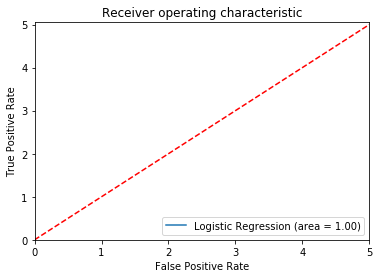

In [72]:
warnings.filterwarnings("ignore")
#warnings.filterwarnings("ignore",category=UndefinedMetricWarning)
df_train=data_Binary(19,train_list)
X_train_new=pd.DataFrame({'Q1_5_3': df_train["Q1_5_3"],'min_5_3':df_train["min_5_3"],'max_1_13':df_train["max_1_13"],'min_5_17':df_train["min_5_17"]})
Y_train_new=df_train["class"]
model= LogisticRegression()
v=model.fit(X_train_new,Y_train_new)
predictor=model.predict(X_train_new)
R_A= roc_auc_score(Y_train_new,predictor.astype(float))
a, b, thresholds = roc_curve(Y_train,predictor.astype(float),pos_label=2)
plt.figure()
plt.plot(a, b, label='Logistic Regression (area = %0.2f)' % R_A)
plt.plot([0, 5], [0, 5],'r--')
plt.xlim([0.0, 5.0])
plt.ylim([0.0, 5.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [73]:
from collections import Counter
Counter(Y_train) # y_true must be your labels

Counter({'1': 8, '0': 60})

In [74]:
import statsmodels.api as statsmod
df_train=data_Binary(19,train_list)
X_new1=pd.DataFrame({'Q1_5_3': df_train["Q1_5_3"],'min_5_3':df_train["min_5_3"],'max_1_13':df_train["max_1_13"],'min_5_17':df_train["min_5_17"]})
logit_model= statsmod.Logit(Y_train.astype(float),X_new1.astype(float),maxiter=100000000)
p=logit_model.fit(method='bfgs',maxiter=100000)
print(p.summary2())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
                          Results: Logit
Model:              Logit            Pseudo R-squared: 1.000      
Dependent Variable: class            AIC:              8.0000     
Date:               2019-02-25 23:56 BIC:              16.8781    
No. Observations:   68               Log-Likelihood:   -1.2533e-05
Df Model:           3                LL-Null:          -24.630    
Df Residuals:       64               LLR p-value:      1.1480e-10 
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
            Coef.   Std.Err.    z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------
Q1_5_3      1.9887 6314.5182  0.0003 0.9997 -12374.2396 12378.2169
min_5_3     2.1543 1604.5504  0.0013 0.9989  -3142

In [75]:
df_train=data_Binary(19,train_list)
X_new=pd.DataFrame({'Q1_5_3': df_train["Q1_5_3"],'min_5_3':df_train["min_5_3"],'max_1_13':df_train["max_1_13"],'min_5_17':df_train["min_5_17"]})
Y_train=df_train["class"]
model= LogisticRegression()
v=model.fit(X_new,Y_train)
predi=model.predict(X_new)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train,predi))
import statsmodels.api as sm

[[60  0]
 [ 0  8]]


###### Applying trained classifier on test data

In [76]:
df_test=data_Binary(19,test_list)### function call to break the test data same as what was done for train data
X_test=pd.DataFrame({'Q1_5_3': df_test["Q1_5_3"],'min_5_3':df_test["min_5_3"],'max_1_13':df_test["max_1_13"],'min_5_17':df_test["min_5_17"]})
Y_test=df_test["class"]
predict_test = model.predict(X_test)### performing predictions on "model" object that was used to fit train data. Predictions are performed on the features extracted from previous outcomes.
accuracy_score(Y_test,predict_test)


1.0

Accuracies obtained from Test data is 0.1 while that for train data is 0.985714285714.

When classes are well-separated,parameter estimates for logistic
regression model provide valuable derivations. Logistic regression in 
such case gives good classifier ,in our case, for min_avg_rss_13 and max_avg_rs23, for example.Mathematically,in such scenarios the maximum likelihood estimate for inputs doesnot exist. The coefficients for such variables are large. In our data, not all predictors are well-separated such that they could cause instability in calculating logistic regression parameters.


In [77]:
from imblearn.over_sampling import SMOTE ### pip install imblearn
sm = SMOTE(random_state=9,k_neighbors=3)
X_train_r, y_train_r = sm.fit_sample(X_new, Y_train)

1.0


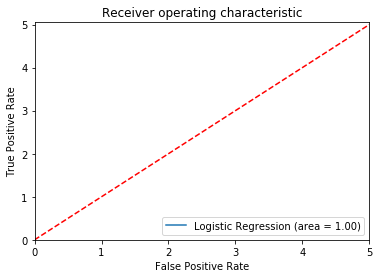

Confusion matrix
[[60  0]
 [ 0  8]]


In [78]:
warnings.filterwarnings("ignore")
model_2 =LogisticRegression()
model_2.fit(X_train_r,y_train_r)
test_pred=model_2.predict(X_train_r)
from sklearn.metrics import accuracy_score
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_res, y_test_res)))
print(accuracy_score(y_train_r, test_pred))
#test_pred
R_A_r = roc_auc_score(y_train_r,test_pred.astype(float))
a, b, thresholds = roc_curve(Y_train,predictor.astype(float),pos_label=2)
plt.figure()
plt.plot(a, b, label='Logistic Regression (area = %0.2f)' % R_A)
plt.plot([0, 5], [0, 5],'r--')
plt.xlim([0.0, 5.0])
plt.ylim([0.0, 5.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print("Confusion matrix")
print(confusion_matrix(Y_train,predi))

Performed case controlled sampling using SMOTE. Above are the ROC,AUC outcomes and confusion matrix results. Results are similar to the outcome derived with no case-controled sampling.

##### Binary Classification Using L1-penalized logistic regression 

In [57]:
#from sklearn.feature_selection import RFECV### regression using 5 fold cross validation
### l1 penalized logistic regression performed with lassoCV crossvalidation
## fitting the model
model= LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
for i in range(1,21):
    df_test=data_Binary(i,train_list)
    X_train=df_test.drop("class",axis=1)
    Y_train=df_test["class"]
    lasso = linear_model.LassoCV(cv=3,max_iter=10000)
    X_train=df_test.drop("class",axis=1)
    Y_train=df_test["class"]
    lasso.fit(X_train,Y_train)
    Lambda_value = lasso.alpha_ 
    print("Lambda value: {}" .format(lasso.alpha_ ))
    print(lasso.score(X_train,Y_train))


Lambda value: 1.0718614197819476
0.2786625378002212
Lambda value: 1.165362049315522
0.20715543610063236
Lambda value: 1.2914042219405204
0.14194473930787654
Lambda value: 1.2834365386033901
0.1306361771097383
Lambda value: 0.9415516756475516
0.30797845061960705
Lambda value: 0.970610867358584
0.34542420580452565
Lambda value: 0.9987608477146084
0.3398300966931502
Lambda value: 0.9663195035922191
0.32656529863460193
Lambda value: 0.7750078346342751
0.4098563869215786
Lambda value: 0.8978488399021904
0.36745254082233214
Lambda value: 1.1541955165578326
0.23511718816643593
Lambda value: 0.32642910119268087
0.6715754687365603
Lambda value: 1.0062011306342056
0.4215892165077215
Lambda value: 1.0851904032370683
0.3921622425310225
Lambda value: 1.1288961693564357
0.33658775201717483
Lambda value: 1.1278489400023095
0.3407468519577071
Lambda value: 1.174624584734654
0.29430554270193676
Lambda value: 1.0148716319929694
0.38606794033156844
Lambda value: 1.0674408583215886
0.4009338315635751
Lamb

In [58]:
#l1 Penalized linear regression
#### testing the model
_lambda = 0.1
c = 1/_lambda
model= LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000, C=c)
for i in range(1,21):
    df_test=data_Binary(i,train_list)
    X_train=df_test.drop("class",axis=1)
    Y_train=df_test["class"]
    rfecv = RFECV(model,step=1, cv=5,scoring='accuracy')
    rfecv.fit(X_train, Y_train)
    score=rfecv.grid_scores_
    print("Value of L "+repr(i)+" is obtained for "+repr(rfecv.n_features_)+" features and the accuracy is "+repr(score[rfecv.n_features_-1]))
#print(score)


Value of L 1 is obtained for 24 features and the accuracy is 0.9857142857142858
Value of L 2 is obtained for 5 features and the accuracy is 0.9846153846153847
Value of L 3 is obtained for 1 features and the accuracy is 0.9846153846153847
Value of L 4 is obtained for 1 features and the accuracy is 0.9846153846153847
Value of L 5 is obtained for 25 features and the accuracy is 0.9417582417582417
Value of L 6 is obtained for 1 features and the accuracy is 0.9417582417582417
Value of L 7 is obtained for 9 features and the accuracy is 0.956043956043956
Value of L 8 is obtained for 3 features and the accuracy is 0.956043956043956
Value of L 9 is obtained for 7 features and the accuracy is 0.956043956043956
Value of L 10 is obtained for 1 features and the accuracy is 0.9417582417582417
Value of L 11 is obtained for 82 features and the accuracy is 0.9549450549450551
Value of L 12 is obtained for 46 features and the accuracy is 0.9703296703296704
Value of L 13 is obtained for 1 features and the

Going by the accuracies obtained and the performance, L1 penalized variable selection produces accuracy of 0.98 . P value obtained is 0.9997.Implementation wise, l2 and l1 penalized logistic regression are better. Performance wise, logit model used to calculate p-values performed better.

#####  L1-penalized multinomial regression model to classify all activities in training set

In [59]:
### getting data for multiclass dataset

def data_Multi(l,list_train_test):
    q=0
    col=[]
    df_temp_multi=[]
    all_col=["avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]

    for file in list_train_test:
        multi_dataframe=[]
        if "bending2\\dataset4" in file:
            multi_data=pd.read_csv(file,skiprows=5,sep=" ",header=None)
            multi_data=multi_data.drop(columns=[7])
            multi_data.columns = ["# Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
        else:
            multi_data=pd.read_csv(file,skiprows=4,warn_bad_lines=False,error_bad_lines=False)

        for p in range(0,len(all_col)):#calculates columns length
            h=0
            m=0
            df_temp_multi=multi_data[[all_col[p]]]
            import math
            df_length=math.ceil(len(df_temp_multi)/l)
            for i in range(1,21):
                if int(m)<len(df_temp_multi):
                    h=h+df_length
                    #print(h)
                    ##print (df_length)
                    file_df=df_temp_multi.iloc[int(m):int(h)]
                    ###  print (file_df)
                    multi_dataframe.append(np.min(file_df[all_col[p]]))
                    multi_dataframe.append(np.max(file_df[all_col[p]]))
                    multi_dataframe.append(np.mean(file_df[all_col[p]]))
                    multi_dataframe.append(np.median(file_df[all_col[p]]))
                    multi_dataframe.append(np.percentile(file_df[all_col[p]],25))
                    multi_dataframe.append(np.percentile(file_df[all_col[p]],75))
                    multi_dataframe.append(np.std(file_df[all_col[p]]))
                    #print(m)
                    if(q==0):
                        col.append("min_{}_{}".format(repr(p+1),repr(i)))
                        col.append("max_{}_{}".format(repr(p+1),repr(i)))
                        col.append("mean_{}_{}".format(repr(p+1),repr(i)))
                        col.append("median_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Q1_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Q3_{}_{}".format(repr(p+1),repr(i)))
                        col.append("Standard_Dev_{}_{}".format(repr(p+1),repr(i)))

                    ### print(q)
                    m=h
                    ## print(m)
                else:
                    break
        if(q==0):
            q+=1
            col.append("class")
            header_df=pd.DataFrame(columns=col)
            multi_head_df=pd.DataFrame(columns=col)
            #final_df=pd.DataFrame(columns=col)
            multi_data_df=pd.DataFrame(columns=col)
        if "bending1" in file:
            multi_dataframe.append("1")
        elif "bending2" in file:
            multi_dataframe.append("2")
        elif "cycling" in file:
            multi_dataframe.append("3")
        elif "lying" in file:
            multi_dataframe.append("4")
        elif "sitting" in file:
            multi_dataframe.append("5")
        elif "standing" in file:
            multi_dataframe.append("6")
        else :
            multi_dataframe.append("7")
        series=pd.Series(multi_dataframe,index=multi_head_df.columns)
        multi_data_df=multi_data_df.append(series,ignore_index=True)
    return(multi_data_df)


In [60]:
import warnings
warnings.filterwarnings("ignore")
model= LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',max_iter=10000)
for i in range(1,21,1):
    df_train_multi=data_Multi(i,train_list)
    X_train=df_train_multi.drop("class",axis=1)
    Y_train=df_train_multi["class"]
    lasso = linear_model.LassoCV(cv=StratifiedKFold(5),max_iter=5000,tol=0.01,normalize=True)
    
    lasso.fit(X_train,Y_train)
    
    print("L value : {}".format(i))
    print("Lambda value: {}" .format(lasso.alpha_ ))
    print("Lasso Score ={}" .format(lasso.score(X_train,Y_train)))
    #print(lasso.score(X_train,Y_train))
    #lasso_score[i] = 
    #print(len(lasso.coef_))
    #decision_function(X_test)
    #print(lasso.coef_)
    a = []
    a= np.array(lasso.coef_)
    k = 0
    index_df = sorted(range(len(a)), key=lambda i:a[i])
    columns_df = []
    columns_df = np.array(df_train_multi.columns)
    #for index_val in index_df :
        ##print(columns_df[index_val])

L value : 1
Lambda value: 0.0001231085804425115
Lasso Score =0.9420807374280874
L value : 2
Lambda value: 0.009845672704331855
Lasso Score =0.7084504060128695
L value : 3
Lambda value: 0.0047603118385834645
Lasso Score =0.816214454431792
L value : 4
Lambda value: 0.010903135992730992
Lasso Score =0.7721347559088783
L value : 5
Lambda value: 0.010616513451018217
Lasso Score =0.7499372469219728
L value : 6
Lambda value: 0.006572383481419699
Lasso Score =0.8575628873994757
L value : 7
Lambda value: 0.009278121121949928
Lasso Score =0.7942084163796156
L value : 8
Lambda value: 0.023511716961186528
Lasso Score =0.613066324717365
L value : 9
Lambda value: 0.014213122688099784
Lasso Score =0.7524712260829886
L value : 10
Lambda value: 0.00919288705170761
Lasso Score =0.8479163619710003
L value : 11
Lambda value: 0.014579511711797378
Lasso Score =0.735312403219436
L value : 12
Lambda value: 0.01815875119452629
Lasso Score =0.6901127881630578
L value : 13
Lambda value: 0.022747005989190043
Lass

In [61]:
df_train_multi=data_Multi(6,train_list)
X_train=df_train_multi.drop("class",axis=1)
Y_train=df_train_multi["class"]
lasso = linear_model.LassoCV(cv=StratifiedKFold(5),max_iter=5000,tol=0.01,normalize=True)
lasso.fit(X_train,Y_train)
#print(i)
#print("Lambda value: {}" .format(lasso.alpha_ ))
#print("Lasso Score ={}" .format(lasso.score(X_train,Y_train)))
print("lambda value is {}".format(lasso.score(X_train,Y_train)))
#lasso_score[i] = 
#print(len(lasso.coef_))
#decision_function(X_test)
#print(lasso.coef_)
a = []
a= np.array(lasso.coef_)
k = 0
columns_df = []
columns_df = np.array(df_train_multi.columns)
index_df = np.where(a>0)
for col in index_df:
    print("below are the best features obtained :")
    #print("{'"+repr(columns_df[col])+"'} : df_train_multi["""+repr(columns_df[col]))
    print(columns_df[col])


lambda value is 0.8575628873994757
below are the best features obtained :
['median_1_4' 'max_1_5' 'max_2_2' 'median_2_2' 'min_2_4' 'median_2_4'
 'min_2_5' 'max_2_5' 'Q1_2_5' 'min_3_4' 'mean_3_6' 'Q1_3_6' 'Q3_3_6'
 'min_4_1' 'min_4_2' 'min_4_3' 'Standard_Dev_5_3' 'Standard_Dev_5_4'
 'Standard_Dev_5_5' 'min_6_1' 'min_6_2' 'min_6_4']


19
19
19
accuracy score: 
0.7894736842105263
confusion matrix :
[[2 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [1 0 0 0 2 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


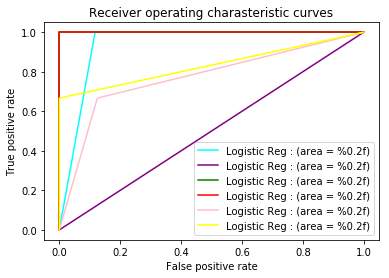

In [62]:
df_test_1=data_Multi(6,test_list)
df_train_multi_1=data_Multi(6,train_list)
model_1= LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',max_iter=10000)
X_train_1=pd.DataFrame({'median_1_3':df_train_multi_1["median_1_3"],
'median_1_4':df_train_multi_1["median_1_4"],
'max_1_5':df_train_multi_1["max_1_5"],
'max_2_2':df_train_multi_1["max_2_2"],
'median_2_2':df_train_multi_1["median_2_2"],
'min_2_4':df_train_multi_1["min_2_4"],
'median_2_4':df_train_multi_1["median_2_4"],
'min_2_5':df_train_multi_1["min_2_5"],
'max_2_5':df_train_multi_1["max_2_5"],
'Q1_2_5':df_train_multi_1["Q1_2_5"],
'min_2_6':df_train_multi_1["min_2_6"],
'min_3_1':df_train_multi_1["min_3_1"],
'median_3_1':df_train_multi_1["median_3_1"],
'min_3_4':df_train_multi_1["min_3_4"],
'mean_3_6':df_train_multi_1["mean_3_6"],
'Q1_3_6':df_train_multi_1["Q1_3_6"],
'Q3_3_6':df_train_multi_1["Q3_3_6"],
'min_4_1':df_train_multi_1["min_4_1"],
'min_4_2':df_train_multi_1["min_4_2"],
'min_4_3':df_train_multi_1["min_4_3"],
'Q1_5_3':df_train_multi_1["Q1_5_3"],
'Standard_Dev_5_3':df_train_multi_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_train_multi_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_train_multi_1["Standard_Dev_5_5"],
'min_6_1':df_train_multi_1["min_6_1"],
'min_6_2':df_train_multi_1["min_6_2"],
'min_6_4':df_train_multi_1["min_6_4"]})
Y_train_1 =df_train_multi_1["class"]

X_test_1=pd.DataFrame({'median_1_3':df_test_1["median_1_3"],
'median_1_4':df_test_1["median_1_4"],
'max_1_5':df_test_1["max_1_5"],
'max_2_2':df_test_1["max_2_2"],
'median_2_2':df_test_1["median_2_2"],
'min_2_4':df_test_1["min_2_4"],
'median_2_4':df_test_1["median_2_4"],
'min_2_5':df_test_1["min_2_5"],
'max_2_5':df_test_1["max_2_5"],
'Q1_2_5':df_test_1["Q1_2_5"],
'min_2_6':df_test_1["min_2_6"],
'min_3_1':df_test_1["min_3_1"],
'median_3_1':df_test_1["median_3_1"],
'min_3_4':df_test_1["min_3_4"],
'mean_3_6':df_test_1["mean_3_6"],
'Q1_3_6':df_test_1["Q1_3_6"],
'Q3_3_6':df_test_1["Q3_3_6"],
'min_4_1':df_test_1["min_4_1"],
'min_4_2':df_test_1["min_4_2"],
'min_4_3':df_test_1["min_4_3"],
'Q1_5_3':df_test_1["Q1_5_3"],
'Standard_Dev_5_3':df_test_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_test_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_test_1["Standard_Dev_5_5"],
'min_6_1':df_test_1["min_6_1"],
'min_6_2':df_test_1["min_6_2"],
'min_6_4':df_test_1["min_6_4"]})
Y_test_1=df_test_1["class"]

print(len(X_test_1))
print(len(Y_test_1))

model.fit(X_train_1,Y_train_1)
predict_test = model.predict(X_test_1)
print(len(predict_test))
print("accuracy score: ")
print(accuracy_score(Y_test_1,predict_test))
print("confusion matrix :")
print(confusion_matrix(Y_test_1,predict_test))



from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb_fit_Y=label_binarize(np.array(Y_test_1).astype(int),classes=[1,2,3,4,5,6,7])
lb_fit_predict=label_binarize(np.array(predict_test).astype(int),classes=[1,2,3,4,5,6,7])
model.fit(X_train_1,Y_train_1)
predict_test = model.predict(X_test_1)
#print(predict_test)
#lb_fit_predict= lb.fit_transform(predict_test)
#print(lb_fit_predict.shape)
cls = 6
fpr=dict()
tpr=dict()
roc_auc=dict()
#skplt.metrics.plot_roc(lb_fit_Y,lb_fit_predict)
for i in range(0,cls):
    #print(lb_fit_Y[:,i],lb_fit_predict[:,i])
    fpr[i],tpr[i],thresholds= roc_curve(lb_fit_Y[:,i],lb_fit_predict[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
plt.figure()
colors_class = ['cyan','purple','green','red','pink','yellow']
for i, colors_class in zip(range(cls),colors_class):
    plt.plot(fpr[i],tpr[i],color=colors_class,label = 'Logistic Reg : (area = %0.2f)'.format(roc_auc[i]))
    #print(roc_auc[i])        
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charasteristic curves')
plt.legend(loc="top right")
plt.show()




###### Na¨ıve Bayes’ classifier using both Gaussian and Multinomial priors 

In [63]:
import warnings
warnings.filterwarnings("ignore")

for i in range(1,21,1):
    df_train_multi=data_Multi(i,train_list)
    X_train=df_train_multi.drop("class",axis=1)
    Y_train=df_train_multi["class"]
    lasso = linear_model.LassoCV(cv=StratifiedKFold(5),max_iter=5000,tol=0.01,normalize=True)
    
    lasso.fit(X_train,Y_train)
    
    print("L value {}".format(i))
    print("Lambda value: {}" .format(lasso.alpha_ ))
    print("Lasso Score ={}" .format(lasso.score(X_train,Y_train)))
    #print(lasso.score(X_train,Y_train))
    #lasso_score[i] = 
    #print(len(lasso.coef_))
    #decision_function(X_test)
    #print(lasso.coef_)
    a = []
    a= np.array(lasso.coef_)
    k = 0
    index_df = sorted(range(len(a)), key=lambda i:a[i])
    columns_df = []
    columns_df = np.array(df_train_multi.columns)
    #for index_val in index_df :
        ##print(columns_df[index_val])

L value 1
Lambda value: 0.0001231085804425115
Lasso Score =0.9420807374280874
L value 2
Lambda value: 0.009845672704331855
Lasso Score =0.7084504060128695
L value 3
Lambda value: 0.0047603118385834645
Lasso Score =0.816214454431792
L value 4
Lambda value: 0.010903135992730992
Lasso Score =0.7721347559088783
L value 5
Lambda value: 0.010616513451018217
Lasso Score =0.7499372469219728
L value 6
Lambda value: 0.006572383481419699
Lasso Score =0.8575628873994757
L value 7
Lambda value: 0.009278121121949928
Lasso Score =0.7942084163796156
L value 8
Lambda value: 0.023511716961186528
Lasso Score =0.613066324717365
L value 9
Lambda value: 0.014213122688099784
Lasso Score =0.7524712260829886
L value 10
Lambda value: 0.00919288705170761
Lasso Score =0.8479163619710003
L value 11
Lambda value: 0.014579511711797378
Lasso Score =0.735312403219436
L value 12
Lambda value: 0.01815875119452629
Lasso Score =0.6901127881630578
L value 13
Lambda value: 0.022747005989190043
Lasso Score =0.680153467349084

accuracy score: 
0.7368421052631579
confusion matrix :
[[2 0 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 1 0 2 0 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


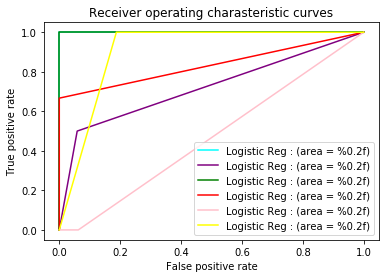

In [64]:
df_test_1=data_Multi(6,test_list)
df_train_multi_1=data_Multi(6,train_list)
#model_g= GaussianNB()
X_train_1=pd.DataFrame({'median_1_3':df_train_multi_1["median_1_3"],
'median_1_4':df_train_multi_1["median_1_4"],
'max_1_5':df_train_multi_1["max_1_5"],
'max_2_2':df_train_multi_1["max_2_2"],
'median_2_2':df_train_multi_1["median_2_2"],
'min_2_4':df_train_multi_1["min_2_4"],
'median_2_4':df_train_multi_1["median_2_4"],
'min_2_5':df_train_multi_1["min_2_5"],
'max_2_5':df_train_multi_1["max_2_5"],
'Q1_2_5':df_train_multi_1["Q1_2_5"],
'min_2_6':df_train_multi_1["min_2_6"],
'min_3_1':df_train_multi_1["min_3_1"],
'median_3_1':df_train_multi_1["median_3_1"],
'min_3_4':df_train_multi_1["min_3_4"],
'mean_3_6':df_train_multi_1["mean_3_6"],
'Q1_3_6':df_train_multi_1["Q1_3_6"],
'Q3_3_6':df_train_multi_1["Q3_3_6"],
'min_4_1':df_train_multi_1["min_4_1"],
'min_4_2':df_train_multi_1["min_4_2"],
'min_4_3':df_train_multi_1["min_4_3"],
'Q1_5_3':df_train_multi_1["Q1_5_3"],
'Standard_Dev_5_3':df_train_multi_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_train_multi_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_train_multi_1["Standard_Dev_5_5"],
'min_6_1':df_train_multi_1["min_6_1"],
'min_6_2':df_train_multi_1["min_6_2"],
'min_6_4':df_train_multi_1["min_6_4"]})
Y_train_1 =df_train_multi_1["class"]

X_test_1=pd.DataFrame({'median_1_3':df_test_1["median_1_3"],
'median_1_4':df_test_1["median_1_4"],
'max_1_5':df_test_1["max_1_5"],
'max_2_2':df_test_1["max_2_2"],
'median_2_2':df_test_1["median_2_2"],
'min_2_4':df_test_1["min_2_4"],
'median_2_4':df_test_1["median_2_4"],
'min_2_5':df_test_1["min_2_5"],
'max_2_5':df_test_1["max_2_5"],
'Q1_2_5':df_test_1["Q1_2_5"],
'min_2_6':df_test_1["min_2_6"],
'min_3_1':df_test_1["min_3_1"],
'median_3_1':df_test_1["median_3_1"],
'min_3_4':df_test_1["min_3_4"],
'mean_3_6':df_test_1["mean_3_6"],
'Q1_3_6':df_test_1["Q1_3_6"],
'Q3_3_6':df_test_1["Q3_3_6"],
'min_4_1':df_test_1["min_4_1"],
'min_4_2':df_test_1["min_4_2"],
'min_4_3':df_test_1["min_4_3"],
'Q1_5_3':df_test_1["Q1_5_3"],
'Standard_Dev_5_3':df_test_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_test_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_test_1["Standard_Dev_5_5"],
'min_6_1':df_test_1["min_6_1"],
'min_6_2':df_test_1["min_6_2"],
'min_6_4':df_test_1["min_6_4"]})
Y_test_1=df_test_1["class"]

model_g= GaussianNB()
model_g.fit(X_train_1,Y_train_1)
predict_test = model_g.predict(X_test_1)
print("accuracy score: ")
print(accuracy_score(Y_test_1,predict_test))
print("confusion matrix :")
print(confusion_matrix(Y_test_1,predict_test))




from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb_fit_Y=label_binarize(np.array(Y_test_1).astype(int),classes=[1,2,3,4,5,6])
lb_fit_predict=label_binarize(np.array(predict_test).astype(int),classes=[1,2,3,4,5,6])
model.fit(X_train_1,Y_train_1)
predict_test = model.predict(X_test_1)
#print(predict_test)
#lb_fit_predict= lb.fit_transform(predict_test)
#print(lb_fit_predict.shape)
cls = 6
fpr=dict()
tpr=dict()
roc_auc=dict()
#skplt.metrics.plot_roc(lb_fit_Y,lb_fit_predict)
for i in range(0,cls):
    #print(lb_fit_Y[:,i],lb_fit_predict[:,i])
    fpr[i],tpr[i],thresholds= roc_curve(lb_fit_Y[:,i],lb_fit_predict[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
plt.figure()
colors_class = ['cyan','purple','green','red','pink','yellow']
for i, colors_class in zip(range(cls),colors_class):
    plt.plot(fpr[i],tpr[i],color=colors_class,label = 'Logistic Reg : (area = %0.2f)'.format(roc_auc[i]))
    #print(roc_auc[i])        
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charasteristic curves')
plt.legend(loc="top right")
plt.show()




In [66]:
import warnings
warnings.filterwarnings("ignore")

for i in range(1,21,1):
    df_train_multi=data_Multi(i,train_list)
    X_train=df_train_multi.drop("class",axis=1)
    Y_train=df_train_multi["class"]
    lasso = linear_model.LassoCV(cv=StratifiedKFold(5),max_iter=5000,tol=0.01,normalize=True)
    
    lasso.fit(X_train,Y_train)
    
    #print(i)
    #print("Lambda value: {}" .format(lasso.alpha_ ))
    #print("Lasso Score ={}" .format(lasso.score(X_train,Y_train)))
    print(lasso.score(X_train,Y_train))
    #lasso_score[i] = 
    #print(len(lasso.coef_))
    #decision_function(X_test)
    #print(lasso.coef_)
    a = []
    a= np.array(lasso.coef_)
    k = 0
    index_df = sorted(range(len(a)), key=lambda i:a[i])
    columns_df = []
    columns_df = np.array(df_train_multi.columns)
    #for index_val in index_df :
        ##print(columns_df[index_val])

0.9420807374280874
0.7084504060128695
0.816214454431792
0.7721347559088783
0.7499372469219728
0.8575628873994757
0.7942084163796156
0.613066324717365
0.7524712260829886
0.8479163619710003
0.735312403219436
0.6901127881630578
0.6801534673490849
0.8081327892142526
0.7968741997738414
0.7949750802972297
0.6611068687570173
0.7702449323822075
0.6853802266999107
0.7905689681546539


accuracy score: 
0.631578947368421
confusion matrix :
[[2 0 0 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 0 3]]


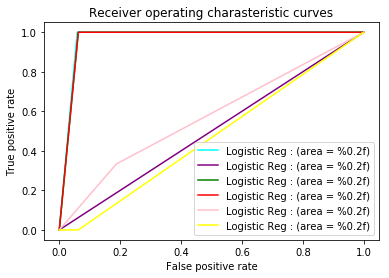

In [67]:
df_test_1=data_Multi(6,test_list)
df_train_multi_1=data_Multi(6,train_list)
#model_g= GaussianNB()
X_train_1=pd.DataFrame({'median_1_3':df_train_multi_1["median_1_3"],
'median_1_4':df_train_multi_1["median_1_4"],
'max_1_5':df_train_multi_1["max_1_5"],
'max_2_2':df_train_multi_1["max_2_2"],
'median_2_2':df_train_multi_1["median_2_2"],
'min_2_4':df_train_multi_1["min_2_4"],
'median_2_4':df_train_multi_1["median_2_4"],
'min_2_5':df_train_multi_1["min_2_5"],
'max_2_5':df_train_multi_1["max_2_5"],
'Q1_2_5':df_train_multi_1["Q1_2_5"],
'min_2_6':df_train_multi_1["min_2_6"],
'min_3_1':df_train_multi_1["min_3_1"],
'median_3_1':df_train_multi_1["median_3_1"],
'min_3_4':df_train_multi_1["min_3_4"],
'mean_3_6':df_train_multi_1["mean_3_6"],
'Q1_3_6':df_train_multi_1["Q1_3_6"],
'Q3_3_6':df_train_multi_1["Q3_3_6"],
'min_4_1':df_train_multi_1["min_4_1"],
'min_4_2':df_train_multi_1["min_4_2"],
'min_4_3':df_train_multi_1["min_4_3"],
'Q1_5_3':df_train_multi_1["Q1_5_3"],
'Standard_Dev_5_3':df_train_multi_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_train_multi_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_train_multi_1["Standard_Dev_5_5"],
'min_6_1':df_train_multi_1["min_6_1"],
'min_6_2':df_train_multi_1["min_6_2"],
'min_6_4':df_train_multi_1["min_6_4"]})
Y_train_1 =df_train_multi_1["class"]

X_test_1=pd.DataFrame({'median_1_3':df_test_1["median_1_3"],
'median_1_4':df_test_1["median_1_4"],
'max_1_5':df_test_1["max_1_5"],
'max_2_2':df_test_1["max_2_2"],
'median_2_2':df_test_1["median_2_2"],
'min_2_4':df_test_1["min_2_4"],
'median_2_4':df_test_1["median_2_4"],
'min_2_5':df_test_1["min_2_5"],
'max_2_5':df_test_1["max_2_5"],
'Q1_2_5':df_test_1["Q1_2_5"],
'min_2_6':df_test_1["min_2_6"],
'min_3_1':df_test_1["min_3_1"],
'median_3_1':df_test_1["median_3_1"],
'min_3_4':df_test_1["min_3_4"],
'mean_3_6':df_test_1["mean_3_6"],
'Q1_3_6':df_test_1["Q1_3_6"],
'Q3_3_6':df_test_1["Q3_3_6"],
'min_4_1':df_test_1["min_4_1"],
'min_4_2':df_test_1["min_4_2"],
'min_4_3':df_test_1["min_4_3"],
'Q1_5_3':df_test_1["Q1_5_3"],
'Standard_Dev_5_3':df_test_1["Standard_Dev_5_3"],
'Standard_Dev_5_4':df_test_1["Standard_Dev_5_4"],
'Standard_Dev_5_5':df_test_1["Standard_Dev_5_5"],
'min_6_1':df_test_1["min_6_1"],
'min_6_2':df_test_1["min_6_2"],
'min_6_4':df_test_1["min_6_4"]})
Y_test_1=df_test_1["class"]

model_m= MultinomialNB()
model_m.fit(X_train_1,Y_train_1)
predict_test = model_m.predict(X_test_1)
print("accuracy score: ")
print(accuracy_score(Y_test_1,predict_test))
print("confusion matrix :")
print(confusion_matrix(Y_test_1,predict_test))




from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb_fit_Y=label_binarize(np.array(Y_test_1).astype(int),classes=[1,2,3,4,5,6])
lb_fit_predict=label_binarize(np.array(predict_test).astype(int),classes=[1,2,3,4,5,6])
model.fit(X_train_1,Y_train_1)
predict_test = model.predict(X_test_1)
#print(predict_test)
#lb_fit_predict= lb.fit_transform(predict_test)
#print(lb_fit_predict.shape)
cls = 6
fpr=dict()
tpr=dict()
roc_auc=dict()
#skplt.metrics.plot_roc(lb_fit_Y,lb_fit_predict)
for i in range(0,cls):
    #print(lb_fit_Y[:,i],lb_fit_predict[:,i])
    fpr[i],tpr[i],thresholds= roc_curve(lb_fit_Y[:,i],lb_fit_predict[:,i])
    roc_auc[i] = metrics.auc(fpr[i],tpr[i])
plt.figure()
colors_class = ['cyan','purple','green','red','pink','yellow']
for i, colors_class in zip(range(cls),colors_class):
    plt.plot(fpr[i],tpr[i],color=colors_class,label = 'Logistic Reg : (area = %0.2f)'.format(roc_auc[i]))
    #print(roc_auc[i])        
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating charasteristic curves')
plt.legend(loc="top right")
plt.show()




Residual sum of squares for a complex model would be lower than a linear model since, as the complexity of model increases, it can fit more data resulting in lower RSS. Hence cubic model has higher RSS than linear model.

Given that true relationship between X and Y is linear. Hence RSS will be lower for linear model for the given data.Linear model performs better than cubic model.

More flexible the model, higher will be the variance and better it can fit the data. RSS in case of linear model will be more than that of cubic model.

We are unsure about how far the model is from linear. All we know is that relationship is non-linear. It could be cubic or any other degree. Given this, we can not certainly about the bias-variance trade-off in this case. However,we do not have sufficient information to mention about this.